In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# path = "RawData/ReformattedData.csv"
path = "ReformattedData_final_cleaned.csv"
df = pd.read_csv(path)
df = df.drop(df[df["average"].isna()].index) # remove NaN Average

In [3]:
print(df.columns)
print(df.shape)
mechs_list = df.columns[29:]
print(mechs_list)

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'gameID', 'Unnamed: 0.1', 'Unnamed: 0',
       'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       ...
       'Different Dice Movement', 'Auction: English', 'Induction', 'Drawing',
       'King of the Hill', 'Neighbor Scope', 'Questions and Answers',
       'Bids As Wagers', 'Resource Queue', 'Auction Compensation'],
      dtype='object', length=220)
(23028, 220)
Index(['Dice Rolling', 'Roll / Spin and Move', 'Action Points',
       'Campaign / Battle Card Driven', 'Chit-Pull System',
       'Point to Point Movement', 'Solo / Solitaire Game', 'Area Movement',
       'Hand Management', 'Memory',
       ...
       'Different Dice Movement', 'Auction: English', 'Induction', 'Drawing',
       'King of the Hill', 'Neighbor Scope', 'Questions and Answers',
       'Bids As Wagers', 'Resource Queue', 'Auction Compensation'],
      dtype='object', length=191)


In [4]:
print(df.describe()["average"])

count    23028.000000
mean         6.418133
std          0.935407
min          1.155950
25%          5.832878
50%          6.449715
75%          7.047447
max          9.704760
Name: average, dtype: float64


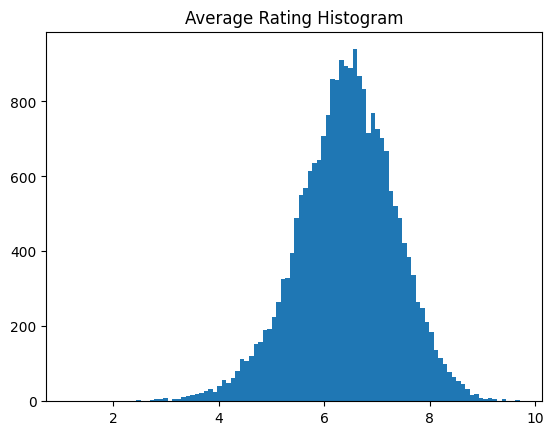

In [5]:
plt.title("Average Rating Histogram")
plt.hist(df["average"], bins=100)
plt.show()

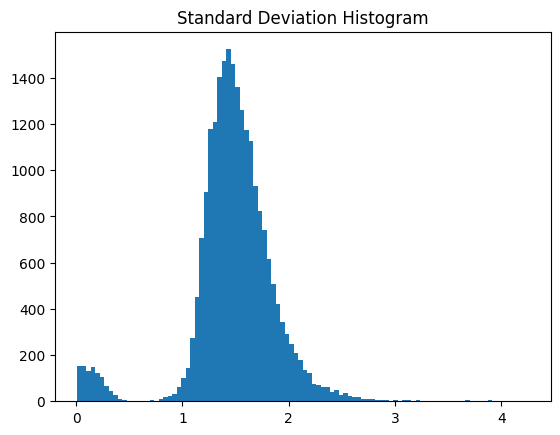

In [6]:
plt.title("Standard Deviation Histogram")
plt.hist(df["stddev"], bins=100)
plt.show()

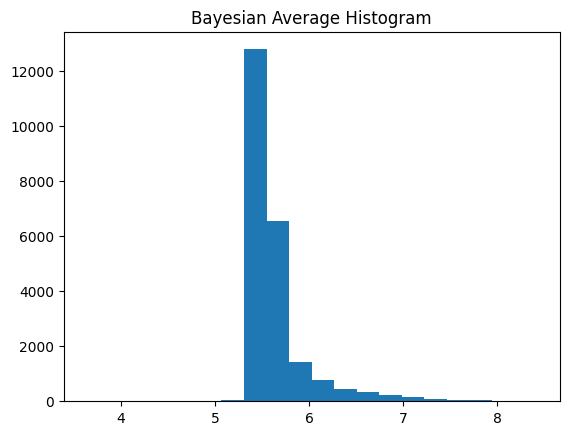

In [7]:
plt.title("Bayesian Average Histogram")
plt.hist(df["bayesaverage"], bins=20)
plt.show()

In [8]:
print(df.describe()["usersrated"])
print("---------------")
print(df.describe()["owned"])
print("---------------")
print(df.describe()["wishing"])
print("---------------")
print(df.describe()["numcomments"])

count     23028.000000
mean        816.619680
std        3566.587219
min          30.000000
25%          54.000000
50%         118.000000
75%         368.000000
max      100590.000000
Name: usersrated, dtype: float64
---------------
count     23028.000000
mean       1323.242140
std        4599.884655
min           1.000000
25%         145.000000
50%         306.000000
75%         838.000000
max      145353.000000
Name: owned, dtype: float64
---------------
count    23028.000000
mean       220.169924
std        787.407016
min          0.000000
25%         14.000000
50%         39.000000
75%        126.000000
max      22642.000000
Name: wishing, dtype: float64
---------------
count    23028.000000
mean       183.467214
std        563.668122
min          1.000000
25%         23.000000
50%         47.000000
75%        124.000000
max      14625.000000
Name: numcomments, dtype: float64


In [9]:
np_data = df.to_numpy()
mechanic_ind = list(range(29, 220))
index_list = [2, 5, 14] + mechanic_ind

In [10]:
np_index = np.array(index_list)
np_data = np_data[:, np_index]
print(np_data.shape)
print(np_data[69])

(23028, 194)
[84 'Rommel in the Desert' 7.53683 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
np_data[np_data[:, 3] == 1].shape # filter mechanics

(6330, 194)

In [12]:
def hamming_distance(x1, x2):
    return np.sum(x1 != x2)

In [13]:
def jaccard_distance(x1, x2):
    same_ones = np.dot(x1, x2)
    diff = np.sum(x1 != x2)
    return diff/(same_ones+diff)

In [14]:
# TODO mutual_information

In [15]:
mechs_only = np_data[:, 3:]
print(mechs_only.shape)
print(mechs_only)

(23028, 191)
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
from sklearn import cluster, metrics

In [17]:
# precalculate distance matrix based on callable metric
hamming_distance_matrix = metrics.pairwise_distances(mechs_only.transpose(), metric=hamming_distance)
jaccard_distance_matrix = metrics.pairwise_distances(mechs_only.transpose(), metric=jaccard_distance)

In [18]:
linkage = "average"
n_clusters = 80

In [19]:
hamming_cluster = cluster.FeatureAgglomeration(n_clusters=n_clusters, metric="precomputed", linkage=linkage)
hamming_cluster.fit(hamming_distance_matrix)

FeatureAgglomeration(linkage='average', metric='precomputed', n_clusters=80)

In [20]:
jaccard_cluster = cluster.FeatureAgglomeration(n_clusters=n_clusters, metric="precomputed", linkage=linkage)
jaccard_cluster.fit(jaccard_distance_matrix)

FeatureAgglomeration(linkage='average', metric='precomputed', n_clusters=80)

In [21]:
cosine_cluster = cluster.FeatureAgglomeration(n_clusters=n_clusters, metric="cosine", linkage=linkage)
cosine_cluster.fit(mechs_only)

FeatureAgglomeration(linkage='average', metric='cosine', n_clusters=80)

In [22]:
print(hamming_cluster.labels_)
print(np.sum(hamming_cluster.labels_ != 0))

[63 55 71 73 54 49 59 67 47 45 75 41 79 40 51 65 72 57 48 46 56 53 43 64
 61 44 69 21  0 39 52 60 25  0 26 74  0  0 22 35 42 77 20 78 19 27  0 68
  0 76  0  0  0 10  0  0 23  0 36  0  0 58  0 37  9 62 66  0 33 50  0 17
  0 31 29 28 32  0  0  0  0 15  0  0  0  0 70  0  0  0 12 13 24  0  0  0
  0  0  0  0  0  0 11 38  0  0  0 30  0  0  0  0  0 34  5  0 14  0  0  0
  0  0  0 16 18  0  0  0  0  0  0  7  0  0  0  0  0  6  4  0  0  0  0  0
  0  8  0  0  0  0  0  0  0  2  0  0  0  0  0  3  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
79


In [23]:
print(jaccard_cluster.labels_)

[ 6 78  2 38  6 38  2  2  2 69  2 13  2 78  2 22 32  6  6 32 78 22  6  6
 26  2  2 35 11  2 26 78  2 20  6 30 53 53 18 15 41  6 13 51  6 61 42 40
 10  2 40 40  1 52  0  1 59 47 26 41 72 12 74 28  1 67 59 24  6  2 58 40
 24 22 54 13  2 56 56 10 15 15 50 19 17 28 15  3 63 32 68 26 40  5  4 44
 15  4 65 29 27 57  6 18  0  9 45  8 46 73 64 66 12  7  6 77 18  6 25 43
 71 27 27 75  6 16 27 53 48 10 19 61 13 29 61 66  8 18 18  0  7 17  7 21
 15  2 30 58 36 79  2 12 30 70 39 16 65 62 70 20 11 15 21  5 19 19 14 46
 60 20 23 10 35 57  4 34 31 29  9 55 14 14 50 49 76 34  3 36 37 33 19]


In [24]:
print(cosine_cluster.labels_)

[17 42  3  3 17  3 72  3  3 71  3 60  3 42  3 32 36 17 17 36 42 32 17 17
 48  3  3 32 24  3 27 42 44 46 17  1 74 74  7 27 75 17 60 43 17 28 52 60
 19 72 60 60 29 62 30 29 14 48 27 75 69 15 12 22 29 73 14 11 17  3 23 60
 11 12 77 50 72 34 34 19 27  9 59 39 13 22  9 35 54 36  4 27 38 13  6 57
  9  6 66  2  5 56 17  7  9 18 53  2  4 67 79 37 15 76 17 68  7 78 49 41
 47  5  5 58 78 16  5 20 45 19 20 28 50  2 28 37  2  7  7 30 14  7 76 10
 27 72  1 23  8 63 72 15  1 38 65 16 66 70 38 46 24  9 10 33 39 39  0  4
 61 46 64 19 32 56  6 21 55 44 18 51  0  0 59 26 31 21 35  8 40 25 39]


In [25]:
mechs_list # TODO place mechanics by name with each other

Index(['Dice Rolling', 'Roll / Spin and Move', 'Action Points',
       'Campaign / Battle Card Driven', 'Chit-Pull System',
       'Point to Point Movement', 'Solo / Solitaire Game', 'Area Movement',
       'Hand Management', 'Memory',
       ...
       'Different Dice Movement', 'Auction: English', 'Induction', 'Drawing',
       'King of the Hill', 'Neighbor Scope', 'Questions and Answers',
       'Bids As Wagers', 'Resource Queue', 'Auction Compensation'],
      dtype='object', length=191)

In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

In [27]:
import time

In [28]:
shuffled_df = df.sample(frac=1)
train_df = shuffled_df[:18000]
test_df = shuffled_df[18000:]

In [29]:
train_X = train_df[mechs_list]
train_Y = train_df["average"].to_frame()
test_X = test_df[mechs_list]
test_Y = test_df["average"].to_frame()

In [30]:
print("train_Y stats:")
print(train_Y.describe())
print("---------------")
print("test_Y stats:")
print(test_Y.describe())

train_Y stats:
            average
count  18000.000000
mean       6.413652
std        0.937318
min        1.155950
25%        5.832945
50%        6.447215
75%        7.040050
max        9.704760
---------------
test_Y stats:
           average
count  5028.000000
mean      6.434176
std       0.928449
min       2.006100
25%       5.832878
50%       6.459615
75%       7.072773
max       9.648890


In [31]:
def loss(model, X, Y):
    pred = model.predict(X)
    mse = metrics.mean_squared_error(Y, pred)
    return mse

In [32]:
max_leaf_list = list(2**n for n in range(4, 15))
# max_leaf_list = [64]
max_features = 1.0
tree_reg_test_loss = dict()
tree_reg_models = dict()
for max_leaf_nodes in max_leaf_list:
    tree_reg = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, max_features=max_features)
    tree_reg.fit(train_X, train_Y)
    tree_reg_models[max_leaf_nodes] = tree_reg
    tree_reg_test_loss[max_leaf_nodes] = loss(tree_reg, test_X, test_Y)

In [33]:
print("Tree Regression test loss:")
print(tree_reg_test_loss)

Tree Regression test loss:
{16: 0.6592569457011701, 32: 0.6456175228546972, 64: 0.631152030981763, 128: 0.6364132897746569, 256: 0.6487006281215377, 512: 0.6647164623168935, 1024: 0.6960914142138804, 2048: 0.7301458157707758, 4096: 0.7771309105325347, 8192: 0.7992093234442277, 16384: 0.8046529665658466}


In [34]:
n_neighbors_list = list(range(11, 70, 2)) #+ list(int(np.sqrt(train_X.shape[0])*2**(n-3)) for n in range(6))
knn_models = dict()
knn_test_loss = dict()
t = time.time()
for n_neighbors in n_neighbors_list:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, metric="cosine", weights="uniform")
    knn.fit(train_X, train_Y)
    knn_models[n_neighbors] = knn
    knn_test_loss[n_neighbors] = loss(knn, test_X, test_Y)
print(time.time()-t, "seconds")

44.498191595077515 seconds


In [35]:
print("KNN test loss:")
print(knn_test_loss)

KNN test loss:
{11: 0.672234251091368, 13: 0.6694680439969711, 15: 0.6690584662122122, 17: 0.6580114691490886, 19: 0.6466585728601605, 21: 0.6457721538944633, 23: 0.6499156317282686, 25: 0.6456067015519998, 27: 0.649649986019385, 29: 0.647932140598653, 31: 0.6471422786201348, 33: 0.6496388379257109, 35: 0.6475508421116022, 37: 0.6485612252670667, 39: 0.6485716624573113, 41: 0.6491594074520356, 43: 0.6465364013038286, 45: 0.6501865649996862, 47: 0.6514069425434048, 49: 0.6534941220643818, 51: 0.6542122010836575, 53: 0.6520291179827593, 55: 0.6527611644954451, 57: 0.6526091064024164, 59: 0.6561901149809432, 61: 0.6534831162243622, 63: 0.6501842836284121, 65: 0.6482147592352842, 67: 0.650864632285532, 69: 0.6495075871463873}


In [36]:
hgbr = HistGradientBoostingRegressor(max_iter=100, max_bins=2, categorical_features=[True]*train_X.shape[1], verbose=False)
hgbr.fit(train_X, train_Y.squeeze())
print("GradientBoosting")
print("Train loss:", loss(hgbr, train_X, train_Y))
print("Test loss:", loss(hgbr, test_X, test_Y))

GradientBoosting
Train loss: 0.5598890906770164
Test loss: 0.5828977258746254


In [37]:
max_samples = 0.25
max_features = None
max_leaf_nodes = 512
rfg_models = dict()
rfg_test_loss = dict()
verbose = True
n_estimators = 50
rfg = RandomForestRegressor(n_estimators, max_leaf_nodes=max_leaf_nodes, 
                            max_samples=max_samples, max_features=max_features, verbose=verbose)
rfg.fit(train_X, train_Y.squeeze())
rfg_models[n_estimators] = rfg
rfg_test_loss[n_estimators] = loss(rfg, test_X, test_Y)
print("Train loss with n=" + str(n_estimators), loss(rfg, train_X, train_Y))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Train loss with n=50 0.5187115812442594


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [38]:
print("RandomForestRegression test loss:")
print(rfg_test_loss)

RandomForestRegression test loss:
{50: 0.5920418830334202}


In [39]:
print("Feature importances in Tree Regression 64 leaves")
print(tree_reg_models[64].feature_importances_)

Feature importances in Tree Regression 64 leaves
[0.00829312 0.24346103 0.00794485 0.01303701 0.00638859 0.0028363
 0.15933169 0.00595326 0.0076734  0.         0.01154584 0.00319234
 0.08663746 0.00274153 0.         0.00928722 0.         0.04833833
 0.08259757 0.0027366  0.         0.         0.01937556 0.
 0.         0.00379145 0.00273095 0.         0.         0.
 0.00396334 0.         0.03265498 0.         0.         0.
 0.         0.         0.02705304 0.         0.         0.00892527
 0.         0.00339514 0.00329813 0.0076067  0.         0.00275159
 0.         0.00321753 0.         0.         0.         0.
 0.         0.         0.         0.         0.01783874 0.
 0.         0.00235945 0.         0.         0.00577037 0.
 0.         0.         0.01201017 0.02674846 0.         0.
 0.         0.         0.         0.         0.02472965 0.
 0.         0.         0.         0.00317122 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00

In [46]:
# TODO fit a tree on the entire dataset and do this
tree = tree_reg_models[64].tree_
print(tree.value.squeeze())
print(tree.n_node_samples)
print(tree.feature)

[6.41365179 6.4760758  5.43374538 6.4227314  7.27432949 6.37333811
 6.89951431 6.31566091 6.79429504 6.27955733 6.794665   6.254846
 6.8781972  6.23655864 6.8437528  6.22612657 7.17009981 6.19862087
 6.60164079 6.17136915 6.58794888 6.15604103 6.72956812 6.13862964
 6.57047901 6.11454269 6.38477689 6.10939654 7.09231071 6.10064495
 6.68751593 5.32192392 5.7448837  6.77167133 7.68293302 6.09668354
 7.1705     6.09261528 6.93110407 6.08184982 6.41349413 6.55657636
 7.38914157 6.73257542 7.16700308 6.0700431  6.37495567 6.0658726
 6.88295309 6.05666553 6.43610218 6.05446579 7.46169899 6.02645681
 6.16523753 6.01364281 6.35583772 6.68562931 7.02923007 7.19318784
 7.52022264 6.76779149 7.64964074 6.87101027 7.33741158 6.84911059
 7.48693868 6.54098393 7.1067365  6.82038796 7.27657095 6.67323137
 7.64099996 6.01055787 6.93569778 6.00759335 6.94577412 6.42038717
 5.2907717  6.00504421 7.05666231 6.00271676 7.13470364 5.98516774
 6.15552088 7.40558762 7.98537629 6.34617048 6.84299066 6.3248584

In [41]:
# plot_tree(tree_reg_models[64], rounded=True)
# plt.savefig('out.svg')

In [43]:
valueSeries = tree.value.squeeze()

In [45]:
nodeSeries = tree.n_node_samples

In [47]:
featureSeries = tree.feature

In [53]:
treeData = pd.DataFrame({
    "Cluster Average":valueSeries,
    "Number of node sample": nodeSeries,
    "Feature": featureSeries})

In [54]:
treeData


,Cluster Average,Number of node sample,Feature
0,6.413652,18000,1
1,6.476076,16922,6
2,5.433745,1078,0
3,6.422731,15862,18
4,7.274329,1060,12
...,...,...,...
122,6.330773,76,-2
123,5.947369,4316,-2
124,6.442993,48,-2
125,5.299851,765,-2


In [55]:
treeData.to_csv("treeData.csv")